In [29]:
from scipy import stats
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import swifter

## 正しいサイコロを振って、出目に偏りがあると誤って判断する確率

In [3]:
def calc_p_value(x, n):
        return stats.binom_test(x=x, n=n, p=1/6)

In [35]:
fail_probas_list = []
for n in tqdm([10 ** i for i in range(1, 8)]):
    fail_probas = []
    for i in tqdm(range(100)):
        one_cnts = (np.random.randint(1, 7, (1000, n)) == 1).sum(axis=1)
        p_vals = pd.Series(one_cnts).swifter.progress_bar(False).apply(calc_p_value, n=n).values.tolist()
        # p <= 0.05となり誤って有意差があると判断してしまう確率
        fail_probas.append((np.array(p_vals) <= 0.05).sum() / 1000)
    
    fail_probas_list.append(fail_probas)

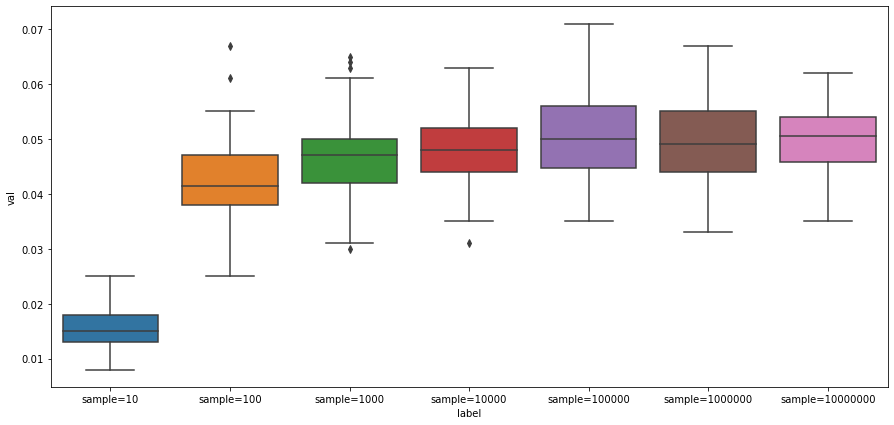

In [36]:
df = pd.DataFrame(fail_probas_list).T
df.columns = [[f'sample={10 ** i}' for i in range(1, 8)]]
unstacked = df.unstack().reset_index()
unstacked.columns = ['label', 'idx', 'val']
plt.figure(figsize=(15, 7))
sns.boxplot(x='label', y='val', data=unstacked)

## 1の目が出やすいサイコロを振って、出目に偏りがあると判断する確率

In [37]:
fail_probas_list = []
for n in tqdm([10 ** i for i in range(1, 8)]):
    fail_probas = []
    for i in tqdm(range(100)):
        one_cnts = (np.random.randint(1, 61, (1000, n)) <= 11).sum(axis=1)
        p_vals = pd.Series(one_cnts).swifter.progress_bar(False).apply(calc_p_value, n=n).values.tolist()
        # p <= 0.05となり誤って有意差があると判断してしまう確率
        fail_probas.append((np.array(p_vals) <= 0.05).sum() / 1000)
    
    fail_probas_list.append(fail_probas)

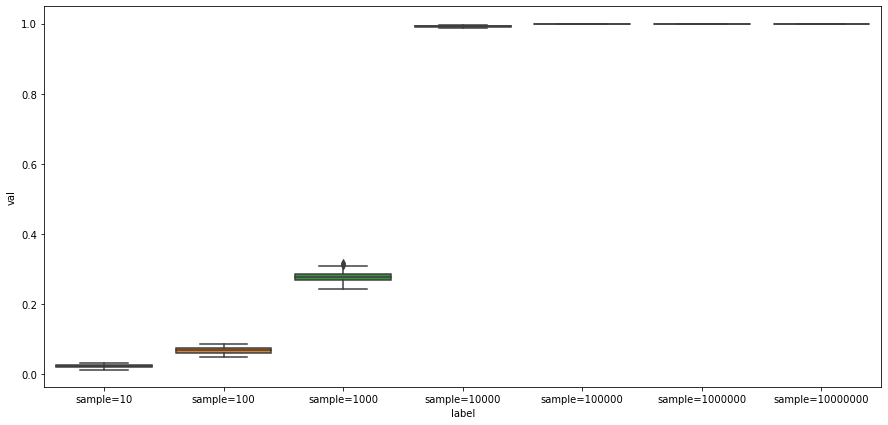

In [38]:
df = pd.DataFrame(fail_probas_list).T
df.columns = [[f'sample={10 ** i}' for i in range(1, 8)]]
unstacked = df.unstack().reset_index()
unstacked.columns = ['label', 'idx', 'val']
plt.figure(figsize=(15, 7))
sns.boxplot(x='label', y='val', data=unstacked)

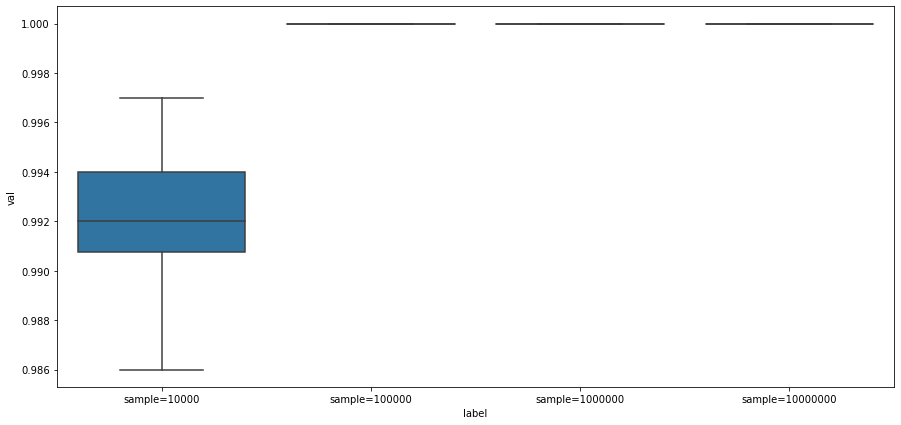

In [43]:
df = pd.DataFrame(fail_probas_list).T
df.columns = [[f'sample={10 ** i}' for i in range(1, 8)]]
unstacked = df.unstack().reset_index()
unstacked.columns = ['label', 'idx', 'val']
unstacked = unstacked[unstacked['label'].isin(['sample=10000', 'sample=100000', 'sample=1000000', 'sample=10000000'])]
plt.figure(figsize=(15, 7))
sns.boxplot(x='label', y='val', data=unstacked)